# Classification regression 

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('Solarize_Light2')

%matplotlib inline

pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#### The _goal_ of this classification project is to analyse the data set that consist of 18,000 current customers of the bank and to train a model that predicts if a bank customer accepts or rejects a credit card offer. These are the definitions of data points provided: 
* __Customer Number__: A sequential number assigned to the customers (this column is hidden and excluded – this unique identifier will not be used directly).
* __Offer Accepted__: Did the customer accept (Yes) or reject (No) the offer. Reward: The type of reward program offered for the card.
* __Mailer Type__: Letter or postcard.
* __Income Level__: Low, Medium, or High.
* __Bank Accounts Open__: How many non-credit-card accounts are held by the customer.
* __Overdraft Protection__: Does the customer have overdraft protection on their checking account(s) (Yes or No).
* __Credit Rating__: Low, Medium, or High.
* __Credit Cards Held__: The number of credit cards held at the bank.
* __Homes Owned__: The number of homes owned by the customer.
* __Household Size__: The number of individuals in the family.
* __Own Your Home__: Does the customer own their home? (Yes or No).
* __Average Balance__: Average account balance (across all accounts over time). 
* __Q1, Q2, Q3, and Q4__ balances
* __Balance__: The average balance for each quarter in the last year


## Reading the file

In [2]:
df = pd.read_csv('creditcardmarketing.csv',  header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


## EDA

### Standardize header names and check data types

In [3]:
# we see that the columns have no headers, therefore we need to name them. 
df.columns = ['Customer number', 'Offer Accepted', 'Reward', 'Mailer Type', 'Income Level', 'Bank Accounts Open', 'Overdraft Protection', 'Credit Rating', 'Credit Cards Held', 'Homes Owned', 'Household Size', 'Own Your Home', 'Average Balance', 'Q1 Balance', 'Q2 Balance','Q3 Balance', 'Q4 Balance']
df.head()

,Customer number,Offer Accepted,Reward,Mailer Type,Income Level,Bank Accounts Open,Overdraft Protection,Credit Rating,Credit Cards Held,Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [4]:
columns = []
for i in range (len(df.columns)):
    columns.append(df.columns[i].lower().replace(" ", "_"))
df.columns = columns #we replace the original column names with the standarized ones
df.head()    

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


#### Set index
The customer_number is a unique value, thus can be set to index.

In [5]:
df.set_index('customer_number', inplace = True) # the column 'customer_number' is set as the index
df.head()

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
customer_number,,,,,,,,,,,,,,,,
1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18000 entries, 1 to 18000
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   offer_accepted        18000 non-null  object 
 1   reward                18000 non-null  object 
 2   mailer_type           18000 non-null  object 
 3   income_level          18000 non-null  object 
 4   bank_accounts_open    18000 non-null  int64  
 5   overdraft_protection  18000 non-null  object 
 6   credit_rating         18000 non-null  object 
 7   credit_cards_held     18000 non-null  int64  
 8   homes_owned           18000 non-null  int64  
 9   household_size        18000 non-null  int64  
 10  own_your_home         18000 non-null  object 
 11  average_balance       17976 non-null  float64
 12  q1_balance            17976 non-null  float64
 13  q2_balance            17976 non-null  float64
 14  q3_balance            17976 non-null  float64
 15  q4_balance         

Data has object, float and integer values.

### Check non-null values

In [7]:
df.isna().sum()

offer_accepted           0
reward                   0
mailer_type              0
income_level             0
bank_accounts_open       0
overdraft_protection     0
credit_rating            0
credit_cards_held        0
homes_owned              0
household_size           0
own_your_home            0
average_balance         24
q1_balance              24
q2_balance              24
q3_balance              24
q4_balance              24
dtype: int64

In [8]:
round(df.isna().sum()/len(df),4)*100

offer_accepted          0.00
reward                  0.00
mailer_type             0.00
income_level            0.00
bank_accounts_open      0.00
overdraft_protection    0.00
credit_rating           0.00
credit_cards_held       0.00
homes_owned             0.00
household_size          0.00
own_your_home           0.00
average_balance         0.13
q1_balance              0.13
q2_balance              0.13
q3_balance              0.13
q4_balance              0.13
dtype: float64

Five columns show the same amount of null values that contribute only to a very small percentage of the whole dataset (0.13%), therefore they can be removed. 

In [9]:
df.dropna(subset=['average_balance'], inplace=True)
df.isna().sum() # then we check if the null values have been removed

offer_accepted          0
reward                  0
mailer_type             0
income_level            0
bank_accounts_open      0
overdraft_protection    0
credit_rating           0
credit_cards_held       0
homes_owned             0
household_size          0
own_your_home           0
average_balance         0
q1_balance              0
q2_balance              0
q3_balance              0
q4_balance              0
dtype: int64

### Explore categorical data

In [10]:
# to see if we need to clean the categorical values, we check the unique values in categorical columns
categorical = df.select_dtypes('object') # first we define what categorical columns are

# a function to check the uniqu values in a dataframe
def check_unique_values(df):
    for col in df:
        print(list(df[col].unique()))

check_unique_values(categorical)

['No', 'Yes']
['Air Miles', 'Cash Back', 'Points']
['Letter', 'Postcard']
['High', 'Medium', 'Low']
['No', 'Yes']
['High', 'Medium', 'Low']
['No', 'Yes']


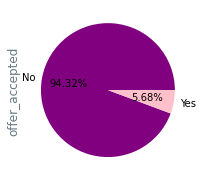

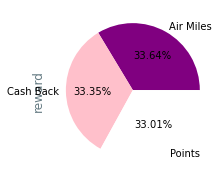

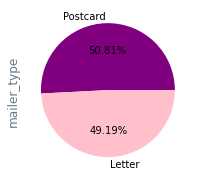

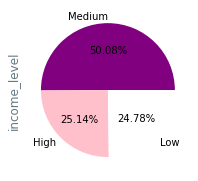

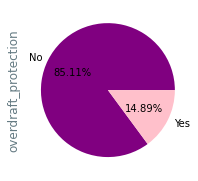

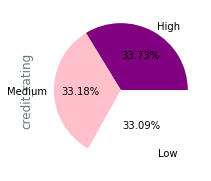

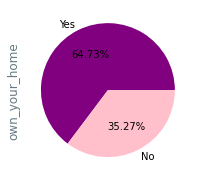

In [11]:
for col in categorical:
    categorical[col].value_counts().plot(kind='pie', autopct = "%.2f%%", colors = ['purple', 'pink', 'white'], figsize=(3, 6))
    plt.show()

##### Findings: 
* 95% of the customers rejected the offer
* Only 35% of the customers do not own a house 


#### Comparison between accepted offers and other categorical columns

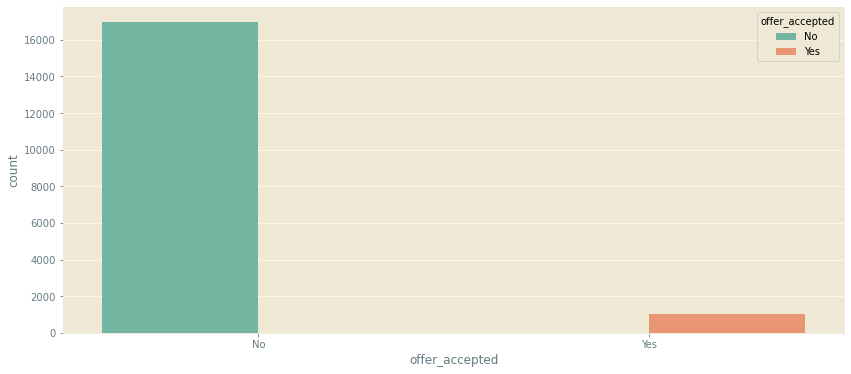

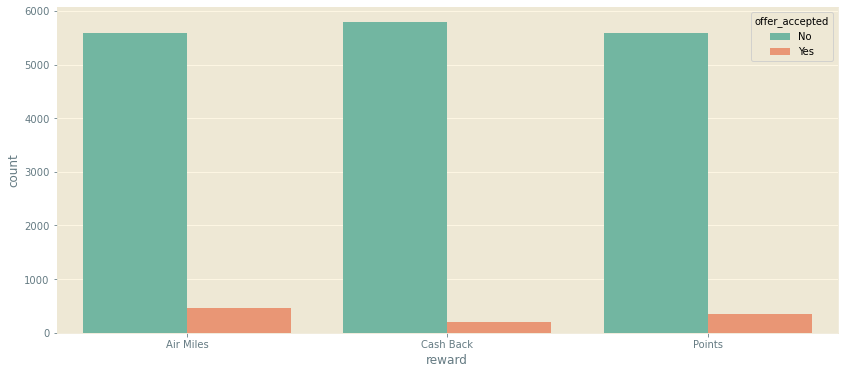

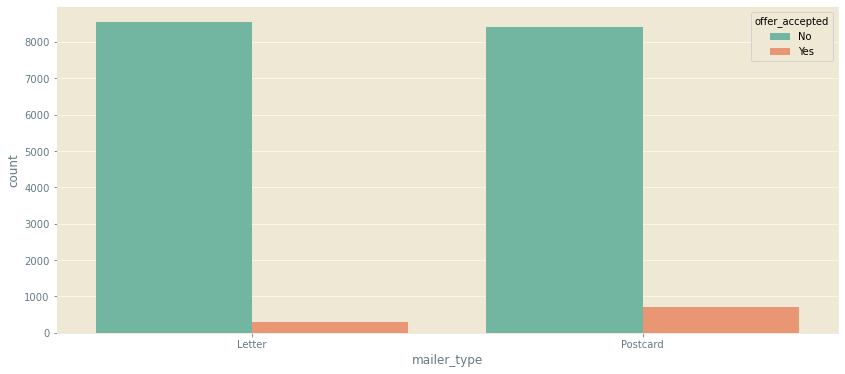

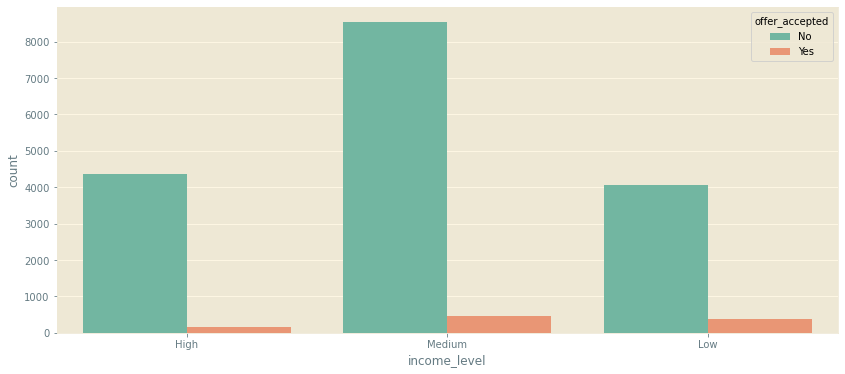

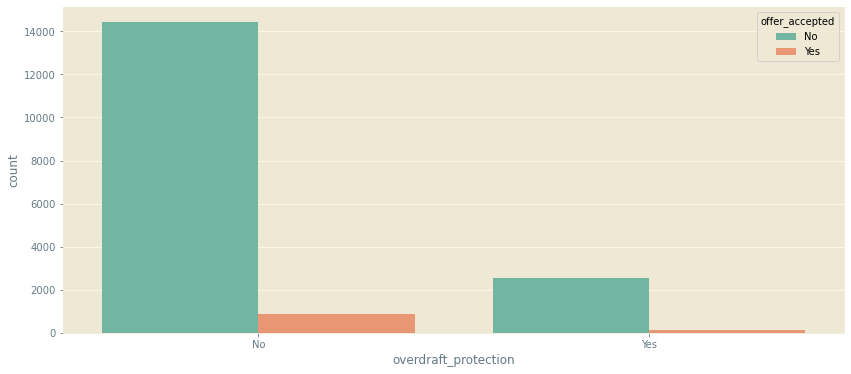

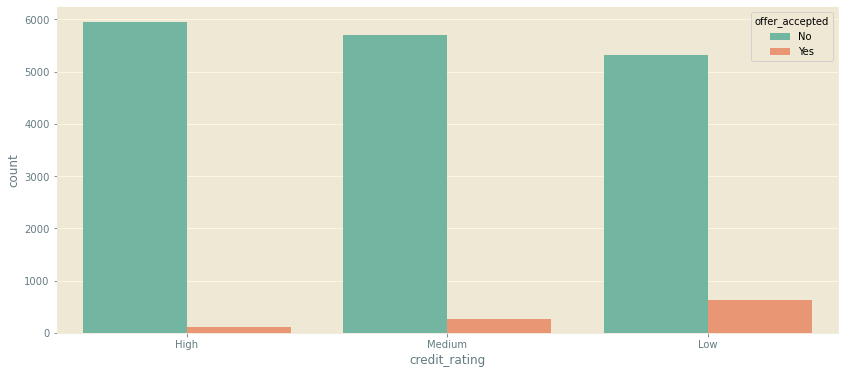

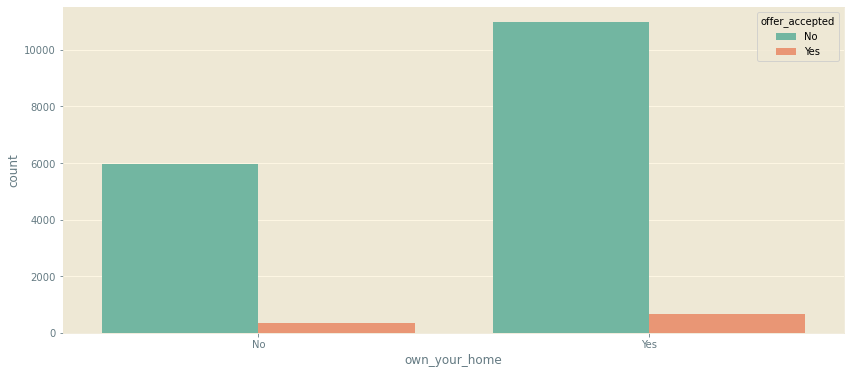

In [12]:
for i in categorical: 
    plt.figure(figsize=(14,6))
    sns.countplot(x = i, hue = 'offer_accepted', data = categorical, palette = "Set2")
    plt.show()

##### Findings: 
* Customers who own their homes are slightly more liekly to acept the offer. 
* Most of the customer who rejected the offer have medium income, interestingly the ones who accepted it also come mostly from medium income background. 

### Explore numerical data

In [13]:
numeric = df.select_dtypes(include=np.number) # create a numerical df
numeric.head()

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
customer_number,,,,,,,,,
1,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0
2,1,2,2,5,147.25,39.0,106.0,78.0,366.0
3,2,2,1,2,276.50,367.0,352.0,145.0,242.0
4,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
5,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0


In [14]:
numeric.describe().apply(lambda x: round(x,1))

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,17976.0,17976.0,17976.0,17976.0,17976.0,17976.0,17976.0,17976.0,17976.0
mean,1.3,1.9,1.2,3.5,940.5,910.5,999.4,1042.0,810.2
std,0.5,0.8,0.4,1.1,350.3,620.1,457.4,553.5,559.0
min,1.0,1.0,1.0,1.0,48.2,0.0,0.0,0.0,0.0
25%,1.0,1.0,1.0,3.0,787.5,392.8,663.0,633.0,363.0
50%,1.0,2.0,1.0,3.0,1007.0,772.0,1032.0,945.5,703.0
75%,1.0,2.0,1.0,4.0,1153.2,1521.0,1342.0,1463.0,1212.0
max,3.0,4.0,3.0,9.0,3366.2,3450.0,3421.0,3823.0,4215.0


In [15]:
print(f'The dataframe has {df.shape[0]} rows and {df.shape[1]} columns')
print(f'There are {len(numeric.columns)} numeric columns and {len(categorical.columns)} categorical columns')
print(f'The categorical columns are {categorical.columns.tolist()}')
print(f'The numerical columns are {numeric.columns.tolist()}')


The dataframe has 17976 rows and 16 columns
There are 9 numeric columns and 7 categorical columns
The categorical columns are ['offer_accepted', 'reward', 'mailer_type', 'income_level', 'overdraft_protection', 'credit_rating', 'own_your_home']
The numerical columns are ['bank_accounts_open', 'credit_cards_held', 'homes_owned', 'household_size', 'average_balance', 'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']


#### Splitting numeric values into discrete and continuous dataframes.

In [16]:
# a function that splits the dataframe based on the datatype
def to_dict(df):
    for col in df.columns:
        if df[col].dtypes == 'int64':
            df1 = df.select_dtypes(include='int64')
            discrete = df1.to_dict()
        else:
            df2 = df.select_dtypes(include='float64')
            continuous = df2.to_dict()
    return continuous, discrete

continuous, discrete = to_dict(numeric) # I applied the function into the numerical dataframe
discrete_df = pd.DataFrame.from_dict(discrete)
discrete_df.head()

,bank_accounts_open,credit_cards_held,homes_owned,household_size
1,1,2,1,4
2,1,2,2,5
3,2,2,1,2
4,2,1,1,4
5,1,2,1,6


In [17]:
continuous_df = pd.DataFrame.from_dict(continuous)
continuous_df.head()

,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
1,1160.75,1669.0,877.0,1095.0,1002.0
2,147.25,39.0,106.0,78.0,366.0
3,276.50,367.0,352.0,145.0,242.0
4,1219.00,1578.0,1760.0,1119.0,419.0
5,1211.00,2140.0,1357.0,982.0,365.0


##### Visual distribution of continuous data

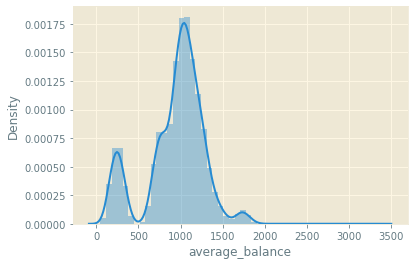

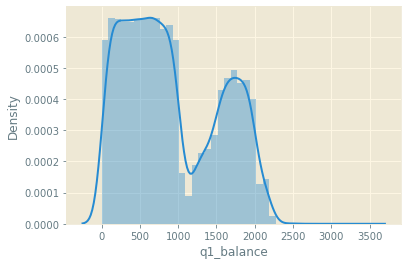

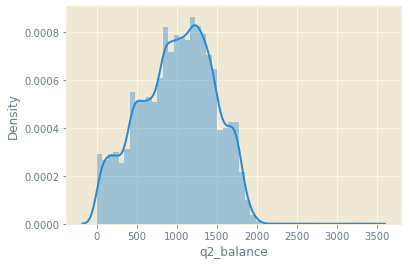

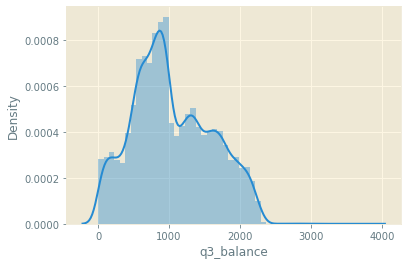

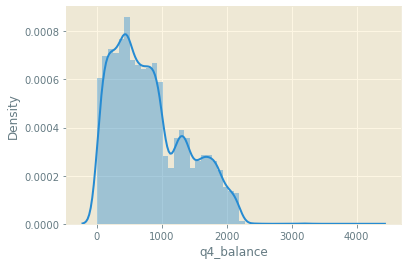

In [18]:
for column in continuous_df.columns:
    sns.distplot(continuous_df[column])
    plt.show()

##### Visualisation of the discrete data

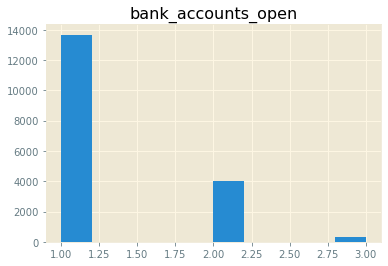

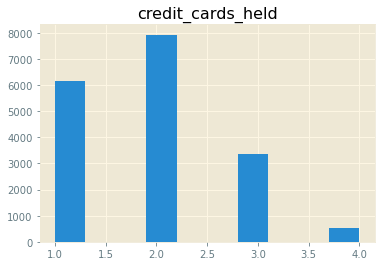

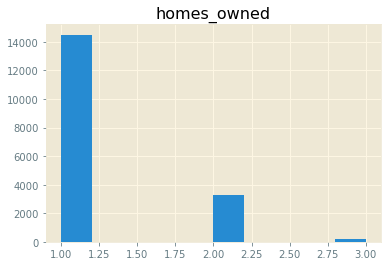

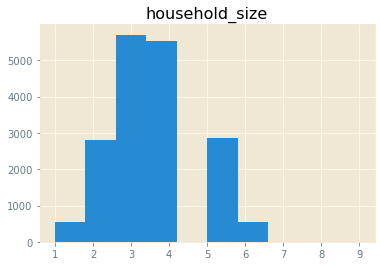

In [19]:
for column in discrete_df:
    discrete_df[column].hist()
    plt.title(column)
    plt.show()

##### Findings: 
* We can see that most of the customers have 1 account in the bank and most of them own 1 house. 
* Among the customers it is popular to have 2 credit cards, and a very small percent of the customers have 4 credit cards. 
* Having 3 or 4 members in the family seems to be quiet common too. 


### Correlation

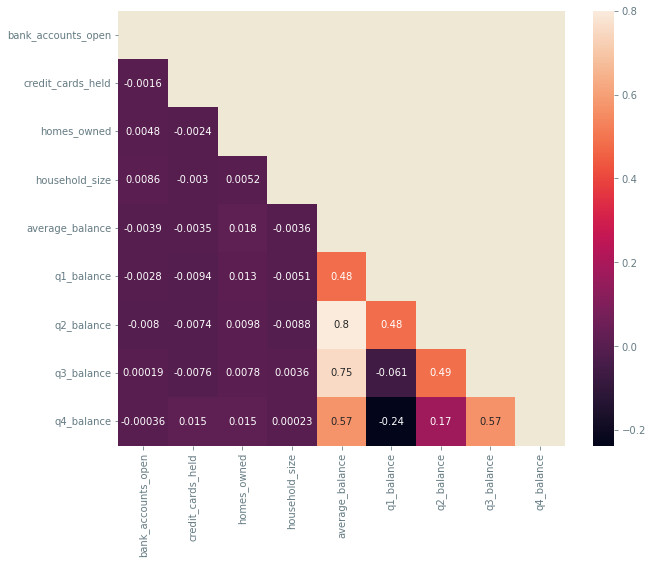

In [20]:
#HEATMAP
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df.corr(), mask=mask, annot=True)
plt.show()


The q2_balance and average_balance have significant correlation (0.8), but I decided to keep it becasue it is not too high.

## Data processing

### Removing outliers

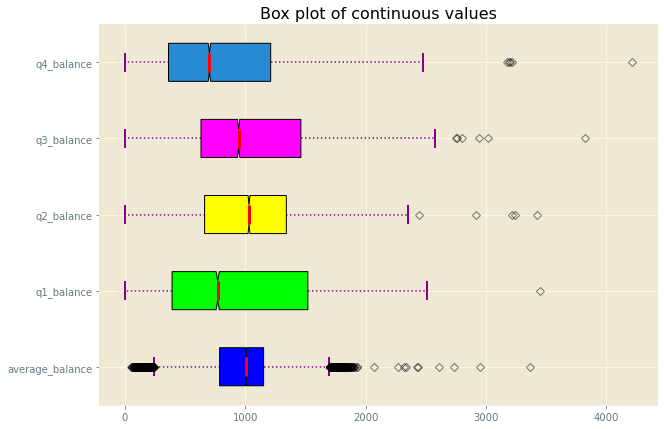

In [21]:
# to see the outliers of the columns with continuous variables in a boxplot
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(continuous_df, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(continuous_df.columns)
 
# Adding title
plt.title("Box plot of continuous values")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

There are a lot of outliers in all columns, especially in the average_balance. The outliers are located too far away from the medians that are shown in red. 
We can remove the outliers, but we need to be careful not to remove too much data. Therefore, we first need to check how many outlliers there are and if the number is not too big we can remove them. If we remove too much, we face the problem of loosing to much data. 

We check how many outliers there are in the average_balance column. First we write a function to find the outliers, and then apply that function to continuous_df['average_balance']

In [22]:
#The function to find outliers:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)
   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-2*IQR)) | (df>(q3+2*IQR)))] # initially I used 1.5 instead of 2, but it was showing too many outliers (1441 to be precise), so I decided to increase the threshold. 

   return outliers

Here I am trying to see the minimum and maximum value of average_balance.

In [23]:
q1_ab=continuous_df['average_balance'].quantile(0.25)
q3_ab=continuous_df['average_balance'].quantile(0.75)
IQR=q3_ab-q1_ab
print(q1_ab-2*IQR, ' is the minimum value')
print(q3_ab+2*IQR, ' is the maximum value')


56.0  is the minimum value
1884.75  is the maximum value


We apply the function to find the outliers in continuous_df['average_balance']

In [24]:
outliers_average_balance = find_outliers_IQR(continuous_df['average_balance'])

print('number of outliers: '+ str(len(outliers_average_balance)))

print('max outlier value: '+ str(outliers_average_balance.max()))

print('min outlier value: '+ str(outliers_average_balance.min()))


number of outliers: 20
max outlier value: 3366.25
min outlier value: 48.25


Now we need to check the proportion of the outliers. 

In [25]:
p = (len(outliers_average_balance) * 100)/ continuous_df.shape[0]
print('There are ', len(continuous_df), 'values in the column `average_balance` and ', p, 'percent are outliers')

There are  17976 values in the column `average_balance` and  0.11125945705384958 percent are outliers


We can conclude that since there are  only few number of outliers, we can remove them from the `average_balance`. The outliers from the rest of the columns will also be removed too.

In [26]:
# FUNCTION TO REMOVE OUTLIERS
def remove_outliers(df, threshold=1.5, in_columns=df.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

In [27]:
clean_cont = remove_outliers(continuous_df, threshold=2, in_columns=continuous_df.select_dtypes(np.number).columns, skip_columns=[]) 

Box plot of the continuous data without the outliers

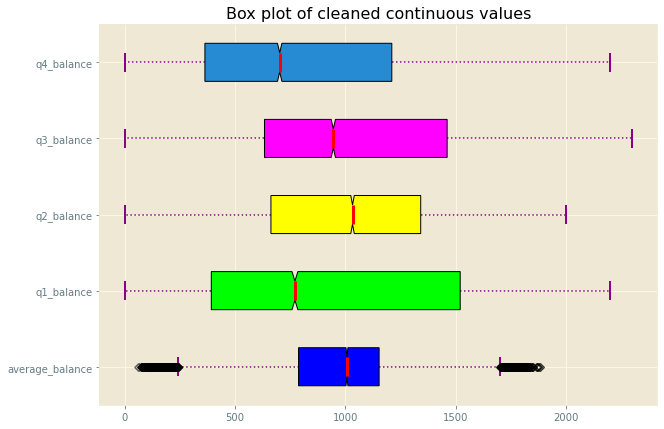

In [28]:
# to see the continuous variables after removing the extreme outliers in a boxplot
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(clean_cont, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(clean_cont.columns)
 
# Adding title
plt.title("Box plot of cleaned continuous values")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

#### Encoding categoricals

In [29]:
cat = categorical.drop(["offer_accepted"], axis = 1 ) # first we drop the target column
cat = pd.get_dummies(cat, drop_first=False) # then we encode the remaining categorical columns
cat.head()

,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,income_level_High,income_level_Low,income_level_Medium,overdraft_protection_No,overdraft_protection_Yes,credit_rating_High,credit_rating_Low,credit_rating_Medium,own_your_home_No,own_your_home_Yes
customer_number,,,,,,,,,,,,,,,
1,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0
2,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1
3,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1
4,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0
5,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1


#### Standardizing numericals

In [30]:
transformer = StandardScaler().fit(clean_cont)
cont_standard = transformer.transform(clean_cont)
cont_standard = pd.DataFrame(cont_standard,index=clean_cont.index, columns=clean_cont.columns.tolist())
cont_standard.head()

,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
1,0.637451,1.227288,-0.266219,0.098160,0.347834
2,-2.278889,-1.406080,-1.959305,-1.744595,-0.795363
3,-1.906973,-0.876176,-1.419099,-1.623194,-1.018250
4,0.805065,1.080272,1.672814,0.141647,-0.700097
5,0.782045,1.988219,0.787842,-0.106590,-0.797161


In [31]:
# we need to concatenate the cleaned contionus columns with the discrete columns. 
# We  use left join, since we have less data in the cont df. 

num_df = pd.merge(cont_standard, discrete_df, how='left', left_index=True, right_index=True)
num_df.head()


,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,bank_accounts_open,credit_cards_held,homes_owned,household_size
1,0.637451,1.227288,-0.266219,0.098160,0.347834,1,2,1,4
2,-2.278889,-1.406080,-1.959305,-1.744595,-0.795363,1,2,2,5
3,-1.906973,-0.876176,-1.419099,-1.623194,-1.018250,2,2,1,2
4,0.805065,1.080272,1.672814,0.141647,-0.700097,2,1,1,4
5,0.782045,1.988219,0.787842,-0.106590,-0.797161,1,2,1,6


In [32]:
num_df.shape[0] == cont_standard.shape[0] # we check if the left join has been done correctly

True

In [33]:
# now we need to merge the numeric dataframe with the categorical dataframe. 
full = pd.merge(num_df, cat, how='left', left_index=True, right_index=True)
full.shape

(17954, 24)

## Train/Test Split

In [34]:
# we separate the target column from the rest
target = df['offer_accepted']
target = pd.DataFrame(target)
# we check if the target column matches size-wise with our dataframe. 
print(f'The original dataframe has {df.shape[0]} rows and {df.shape[1]} columns')
print(f'The target dataframe has {target.shape[0]} rows and {target.shape[1]} columns')
print(f'The categorical encoded dataframe has {cat.shape[0]} rows and {cat.shape[1]} columns')

The original dataframe has 17976 rows and 16 columns
The target dataframe has 17976 rows and 1 columns
The categorical encoded dataframe has 17976 rows and 15 columns


In [35]:
target.value_counts() # to check how the target looks

offer_accepted
No                16955
Yes                1021
dtype: int64

we merge the target variable with the cleaned full dataframe, to align the rows.

In [36]:
full_with_target = pd.merge(full, target, how='left', left_index=True, right_index=True)  
target = full_with_target['offer_accepted']
target = pd.DataFrame(target)
target.shape

(17954, 1)

In [37]:
from sklearn.linear_model import LogisticRegression
y = target['offer_accepted']
X = full

# We separate training and testing datasets and correspondant targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## Model evaluation

### Logistic regression

In [38]:
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.9394839428253202

In [39]:
pd.Series(predictions).value_counts()

No    5387
dtype: int64

In [40]:
print(y_test.value_counts())
print(y.value_counts())

No     5061
Yes     326
Name: offer_accepted, dtype: int64
No     16933
Yes     1021
Name: offer_accepted, dtype: int64


In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[5061,    0],
       [ 326,    0]], dtype=int64)

In [42]:
# Accuracy
from sklearn.metrics import accuracy_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, predictions)))


Accuracy: 0.94



<AxesSubplot:>

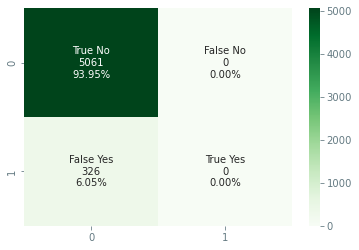

In [43]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False No',
               'False Yes', 'True Yes',]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.94      1.00      0.97      5061
         Yes       0.00      0.00      0.00       326

    accuracy                           0.94      5387
   macro avg       0.47      0.50      0.48      5387
weighted avg       0.88      0.94      0.91      5387



Conclusion for the Logistic regression: 
* The model predicts 'No' with very high precision, but the prediction of 'Yes' is quiet low, due to the data imbalance.  Further I try to address the problem of data imbalance with SMOTE.

### SMOTE 
* Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points.

In [45]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
y = target['offer_accepted']
X = full

X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

No     16933
Yes    16933
Name: offer_accepted, dtype: int64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.8862204724409449

In [47]:
# Accuracy
from sklearn.metrics import accuracy_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, predictions)))


Accuracy: 0.89



<AxesSubplot:>

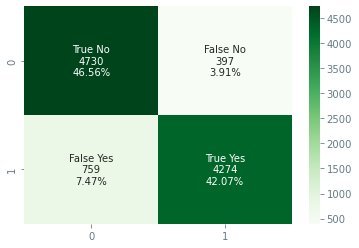

In [48]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False No',
               'False Yes', 'True Yes',]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.86      0.92      0.89      5127
         Yes       0.92      0.85      0.88      5033

    accuracy                           0.89     10160
   macro avg       0.89      0.89      0.89     10160
weighted avg       0.89      0.89      0.89     10160



Conclusion for logistic regression with SMOTE:
* The accuracy score is lower than with the original logistic regression, but this model can predict who accepted the offer. 

### TOMEK
* Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

In [50]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_resample(X, y)
y_tl.value_counts()


No     16488
Yes     1021
Name: offer_accepted, dtype: int64

In [51]:
y.value_counts() 

No     16933
Yes     1021
Name: offer_accepted, dtype: int64

In [52]:
X_tl2, y_tl2 = tl.fit_resample(X_tl, y_tl) # we try one more time
y_tl2.value_counts()
# It does not make the two classes equal but only removes the points from the majority class that are close to other poitns in minority class

No     16355
Yes     1021
Name: offer_accepted, dtype: int64

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_tl2, y_tl2, test_size=0.3, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.9343947822750815

In [54]:
# Accuracy
from sklearn.metrics import accuracy_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, predictions)))


Accuracy: 0.93



<AxesSubplot:>

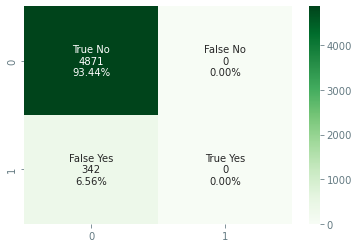

In [55]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False No',
               'False Yes', 'True Yes',]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.93      1.00      0.97      4871
         Yes       0.00      0.00      0.00       342

    accuracy                           0.93      5213
   macro avg       0.47      0.50      0.48      5213
weighted avg       0.87      0.93      0.90      5213



In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.93      1.00      0.97      4871
         Yes       0.00      0.00      0.00       342

    accuracy                           0.93      5213
   macro avg       0.47      0.50      0.48      5213
weighted avg       0.87      0.93      0.90      5213



Conclusion for logistic regression with TOMEK:
* This technique did not help to imporve the prediction. It still has a high accuracy (93%), and  not able to predicte a true 'Yes'

### Upsampling and downsampling

#### Downsampling

In [58]:
#!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
rus = RandomUnderSampler()
y = target['offer_accepted']
X = full
X_rus, y_rus = rus.fit_resample(X, y)
y.value_counts()

No     16933
Yes     1021
Name: offer_accepted, dtype: int64

In [59]:
y_rus.value_counts()

No     1021
Yes    1021
Name: offer_accepted, dtype: int64

In [60]:
transformer = StandardScaler().fit(X_rus)
X = transformer.transform(X_rus)


X_train, X_test, y_train, y_test = train_test_split(X, y_rus, test_size=0.3, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.66721044045677

In [61]:
# Accuracy
from sklearn.metrics import accuracy_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, predictions)))


Accuracy: 0.67



<AxesSubplot:>

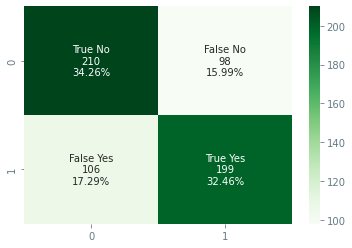

In [62]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False No',
               'False Yes', 'True Yes',]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.66      0.68      0.67       308
         Yes       0.67      0.65      0.66       305

    accuracy                           0.67       613
   macro avg       0.67      0.67      0.67       613
weighted avg       0.67      0.67      0.67       613



#### Upsampling

In [64]:
ros = RandomOverSampler()
y = target['offer_accepted']
X = full
X_ros, y_ros = ros.fit_resample(X, y)
y.value_counts()

No     16933
Yes     1021
Name: offer_accepted, dtype: int64

In [65]:
y_ros.value_counts()

No     16933
Yes    16933
Name: offer_accepted, dtype: int64

In [66]:
transformer = StandardScaler().fit(X_ros)
X = transformer.transform(X_ros)

X_train, X_test, y_train, y_test = train_test_split(X, y_ros, test_size=0.3, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.6974409448818898

In [67]:
 # Accuracy
from sklearn.metrics import accuracy_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, predictions)))


Accuracy: 0.70



<AxesSubplot:>

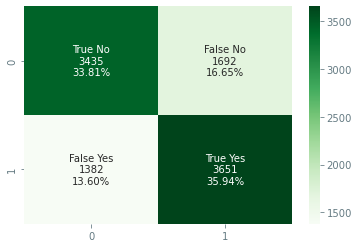

In [68]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False No',
               'False Yes', 'True Yes',]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.71      0.67      0.69      5127
         Yes       0.68      0.73      0.70      5033

    accuracy                           0.70     10160
   macro avg       0.70      0.70      0.70     10160
weighted avg       0.70      0.70      0.70     10160



### Conclusion and recommendation
* Downsampling has an accuracy rate of 68%, while upsampling has 70%. Both are quiet lower than TOMEK or SMOTE.
* Logistic regression using either downsampling or upsampling fits the best for the dataset. They do not have such a high accuracy rate as the initial logistic regression, but it performs better at predicting the true positive answers. 
* It could be interesting to look into collinearity in more detail since in my analysis no columns were removed. The model could potentially perform differently if the collinearity was removed. 
* Implementing different models like KNN could be interesting to look at.
* For the future analysis changing the sampling method is recommended to fix the high accuracy issue. 